# Time-Series Analysis with Formula 1 Data

## Import Data and Libraries

In [ ]:
# Data Source: https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
#from statsmodels.tsa.statespace.sarimax import SARIMAX

In [4]:
constructor_results = pd.read_csv('constructor_results.csv')
constructor_standings = pd.read_csv('constructor_standings.csv')
constructors = pd.read_csv('constructors.csv')
races = pd.read_csv('races.csv')

## Basic Visualization

In [7]:
recent_races = races[(races.year <= 2024) & (races.year >= 2000)].sort_values(by=['year', 'round'])

In [9]:
recent_races['order'] = range(len(recent_races))

In [11]:
recent_standings = pd.merge(recent_races, constructor_standings, on='raceId')

In [13]:
recent_constructors = recent_standings[recent_standings.year == 2024].constructorId.unique()

In [15]:
round1 = recent_standings[recent_standings['round'] == 1][['order', 'year']].drop_duplicates()

/var/folders/6k/6gh7mwnd44g1q3ngnf39sklh0000gn/T/ipykernel_39460/4173472587.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


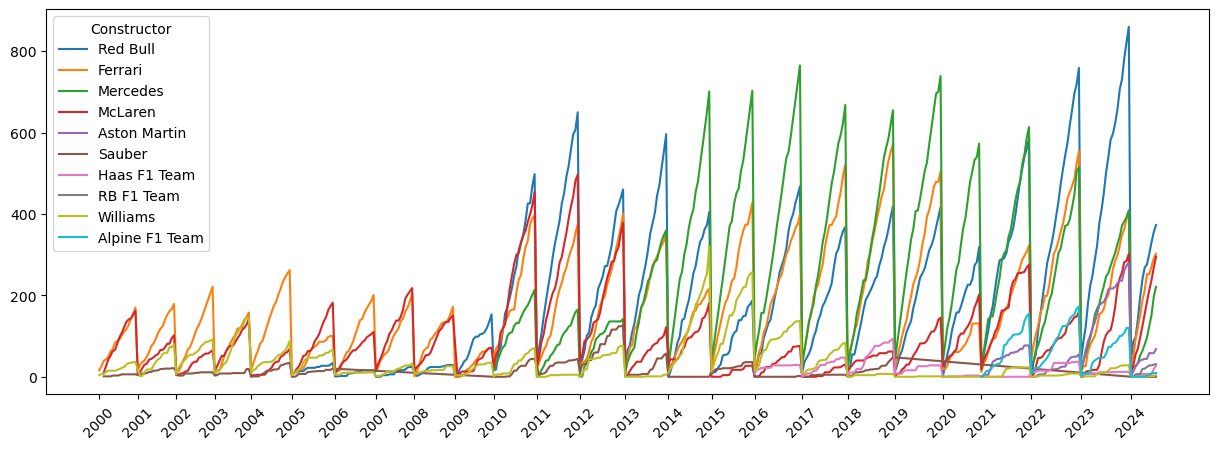

In [17]:
fig, ax = plt.subplots(figsize=(15, 5)) # creates a figure and set of subplots to be 15 by 5

for constructor in recent_constructors: # loop through the constructors that we want to plot
  selected = recent_standings[recent_standings.constructorId == constructor] # getting results for the chosen constructor
  name = constructors[constructors.constructorId == constructor].name.values[0] # extracting the name using the constructorId
  ax.plot(selected.order, selected.points, label=name) # Plotting the standings with constructor names as labels.

ax.legend(title='Constructor')

plt.xticks(round1['order'], round1['year'], rotation=45)
fig.show()

## Seasonal Decomposition

In [20]:
sorted_races = races[(races.year >= 2003) & (races.year <= 2023) & (races['round'] <= 16)].sort_values(by=['year', 'round'])

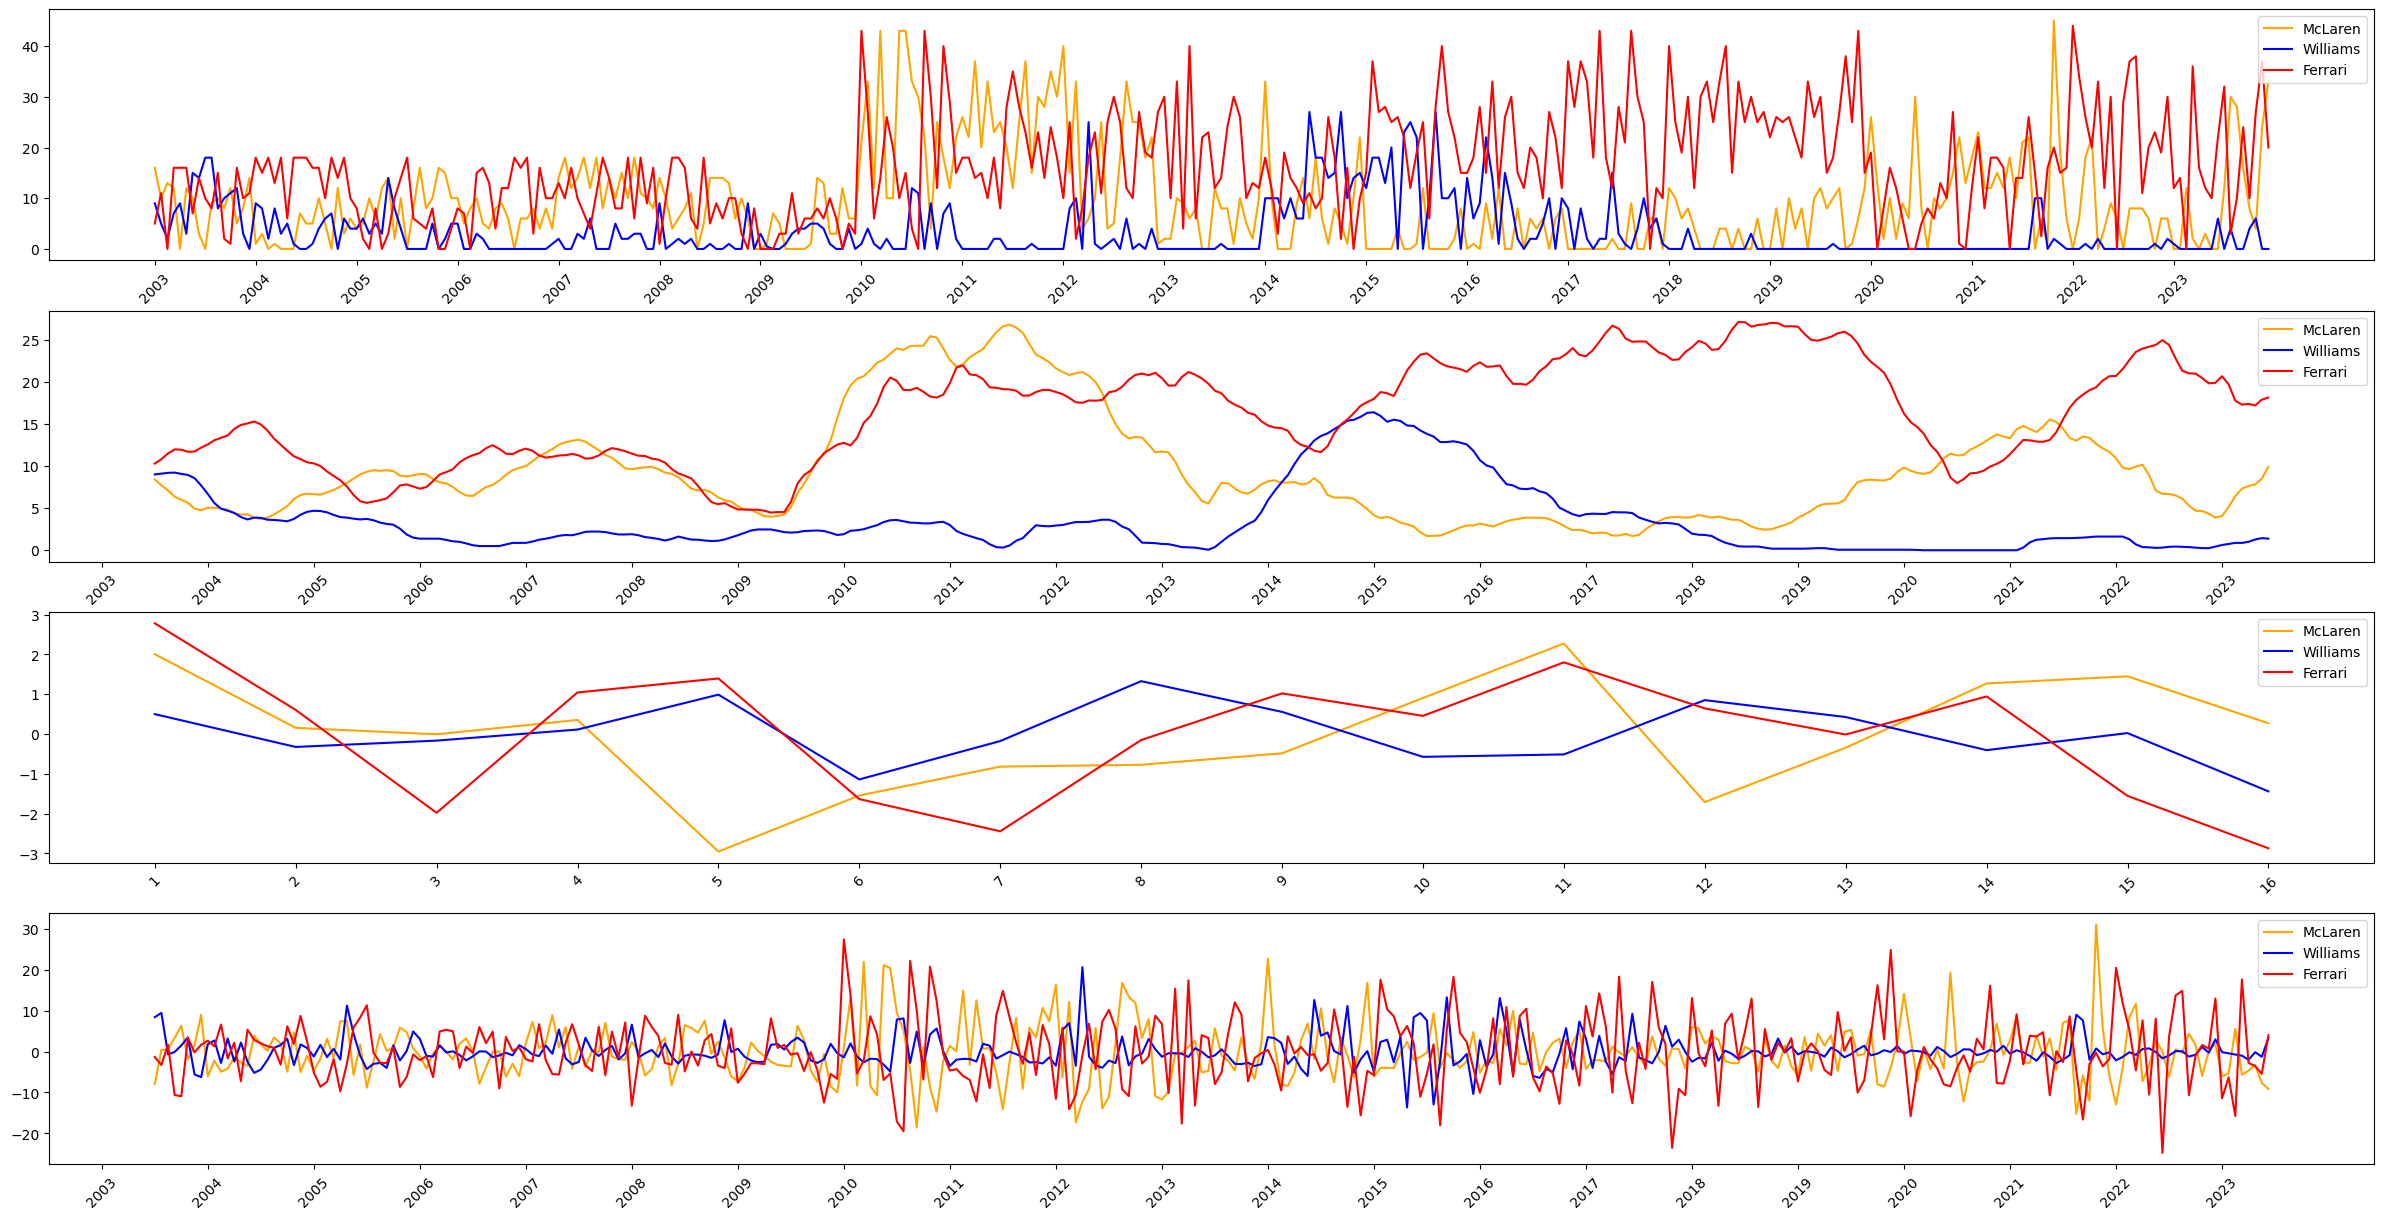

In [22]:
fig, axes = plt.subplots(4, 1, figsize=(30,15))

ids = [1, 3, 6]
colors = ['orange', 'blue', 'red']

for id, color in zip(ids, colors):
  team_standings = constructor_results[constructor_results['constructorId'] == id]
  merged = pd.merge(sorted_races, team_standings)
  result = seasonal_decompose(merged['points'], period=16)
  components = [result.observed, result.trend, result.seasonal[:16], result.resid]

  label = constructors[constructors.constructorId == id].name.values[0]
  for ax, component in zip(axes, components):
      component.plot(ax=ax, color=color, label=label)

round1 = merged[merged['round'] == 1]
for index, ax in enumerate(axes):
  ax.legend(loc='upper right')
  if index == 2:
    ax.set_xticks(range(0, 16))
    ax.set_xticklabels(range(1, 17), rotation=45)
  else:
    ax.set_xticks(round1.index)
    ax.set_xticklabels(round1.year, rotation=45)

plt.show()